## CycleGAN 
the key innovation of CycleGAN is it's ability to learn to translate domains without paired examples. CycleGAN has a variety of intersting and useful applictions such as simulating aging or rejuventation processs on faces to assit digital identity verification or visulizating clothing in different colors or patterns without physically creating each varitant 

CycleGAN uses a cycle consistency loss function to ensure the original image can be reconstructed from the transformed image, encouraging the preservation of key features. The idea behind cycle consistency loss is truly ingenious and deserves to be highlighted here

Cycle consistency loss, a unique concept in CycleGANs, measures the difference between the original image and the fake image after a round-trip conversion. The inclusion of the cycle consistency loss in the total loss function is the key innovation in CycleGANs
## why CycleGAN?
CycleGAN consists of two generators andtwo discrminator. 
the generators translate images from one domain to another, while the discriminators determine the authenticity of the images in their respective domains.


In [1]:
import pandas as pd 
import os, shutil

In [2]:
df = pd.read_csv("celebA/list_attr_celeba.csv")
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
len(
    os.listdir(
        "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/img_align_celeba"
    )
)

124147

In [4]:
# os.makedirs(
#     "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/black",
#     exist_ok=True,
# )
# os.makedirs(
#     "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/blond",
#     exist_ok=True,
# )
# folder = "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/img_align_celeba"
# for i in range(len(df)):
#     dfi = df.iloc[i]
#     if dfi["Black_Hair"] == 1:  # C
#         try:
#             oldpath = f"{folder}/{dfi['image_id']}"
#             newpath = f"/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/black/{dfi['image_id']}"
#             shutil.move(oldpath, newpath)
#         except:
#             pass
#     elif dfi["Blond_Hair"] == 1:  # D
#         try:
#             oldpath = f"{folder}/{dfi['image_id']}"
#             newpath = f"/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/blond/{dfi['image_id']}"
#             shutil.move(oldpath, newpath)
#         except:
#             pass

In [5]:
trainA = "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/black/"
trainB = "/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/celebA/blond/"


In [6]:

import random
import matplotlib.pyplot as plt
from PIL import Image


imgs = os.listdir(trainA)
print(imgs)
random.seed(42)
samples = random.sample(imgs, 8)
imgs1 = os.listdir(trainB)
random.seed(42)
samples1 = random.sample(imgs1, 8)


['097816.jpg', '064999.jpg', '029079.jpg', '169739.jpg', '030976.jpg', '194373.jpg', '132276.jpg', '168274.jpg', '100853.jpg', '056911.jpg', '053807.jpg', '163060.jpg', '063942.jpg', '185143.jpg', '095286.jpg', '143184.jpg', '000515.jpg', '090909.jpg', '015114.jpg', '169381.jpg', '010676.jpg', '023171.jpg', '120500.jpg', '026578.jpg', '109564.jpg', '082754.jpg', '041701.jpg', '157009.jpg', '072012.jpg', '172007.jpg', '029260.jpg', '051584.jpg', '062129.jpg', '169482.jpg', '029938.jpg', '007158.jpg', '061009.jpg', '015145.jpg', '070159.jpg', '001580.jpg', '185343.jpg', '180507.jpg', '151559.jpg', '093242.jpg', '105512.jpg', '037629.jpg', '133591.jpg', '142928.jpg', '174315.jpg', '117604.jpg', '067132.jpg', '162209.jpg', '048092.jpg', '122772.jpg', '045924.jpg', '079000.jpg', '108282.jpg', '021972.jpg', '160781.jpg', '192147.jpg', '009468.jpg', '199831.jpg', '108513.jpg', '176911.jpg', '154073.jpg', '143515.jpg', '141007.jpg', '015381.jpg', '023441.jpg', '077619.jpg', '090357.jpg', '0785

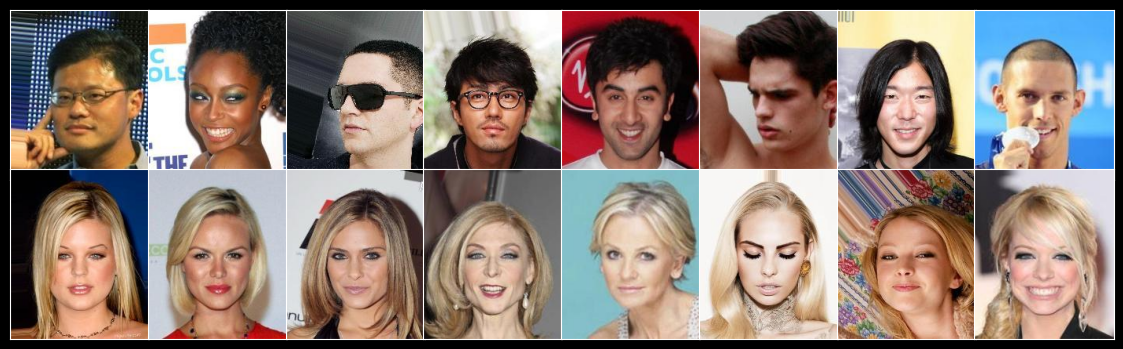

In [7]:

fs = [trainA, trainB]
ps = [imgs, imgs1]
fig = plt.figure(dpi=100, figsize=(1.78 * 8, 2.18 * 2))
for i in range(16):
    ax = plt.subplot(2, 8, i + 1)
    folder = i // 8
    p = i % 8
    img = Image.open(rf"{fs[folder]}{ps[folder][p]}")
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=-0.01, hspace=-0.1)
plt.show()


In [8]:
from utils.util import LoadData
from torch.utils.data import DataLoader
from tqdm import tqdm

import albumentations
from albumentations.pytorch import ToTensorV2

transforms = albumentations.Compose(
    [
        albumentations.Resize(width=256, height=256),  # A
        albumentations.HorizontalFlip(p=0.5),
        albumentations.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255
        ),  # B
        ToTensorV2(),
    ],
    additional_targets={"image0": "image"},
)
dataset = LoadData(
    root_A=[trainA], root_B=[trainB], transform=transforms
)  # C
loader = DataLoader(dataset, batch_size=1, shuffle=True, pin_memory=True)  # D


In [9]:
from utils.util import Discriminator, weights_init
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
disc_A = Discriminator().to(device)
disc_B = Discriminator().to(device)
weights_init(disc_A)
weights_init(disc_B)

In [10]:
from utils.util import Generator

gen_A = Generator(img_channels=3, num_residuals=9).to(device)
gen_B = Generator(img_channels=3, num_residuals=9).to(device)

weights_init(gen_A)
weights_init(gen_B)

In [11]:
g_scaler = torch.cuda.amp.GradScaler() 
d_scaler = torch.cuda.amp.GradScaler()

/tmp/ipykernel_29169/3862156082.py:1: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  g_scaler = torch.cuda.amp.GradScaler()
/tmp/ipykernel_29169/3862156082.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  d_scaler = torch.cuda.amp.GradScaler()


In [12]:
lr = 0.00001
opt_disc = torch.optim.Adam(
    list(disc_A.parameters()) + list(disc_B.parameters()), lr=lr, betas=(0.5, 0.999)
)
opt_gen = torch.optim.Adam(
    list(gen_A.parameters()) + list(gen_B.parameters()), lr=lr, betas=(0.5, 0.999)
)


In [13]:
from utils.util import train_epoch
import torch.nn as nn


l1 = nn.L1Loss()
mse = nn.MSELoss()


In [15]:

for epoch in range(1):
    train_epoch(
        disc_A,
        disc_B,
        gen_A,
        gen_B,
        loader,
        opt_disc,
        opt_gen,
        l1,
        mse,
        d_scaler,
        g_scaler,
        device,
    )  # A
torch.save(gen_A.state_dict(), "files/gen_black.pth")
torch.save(gen_B.state_dict(), "files/gen_blond.pth")


  0%|          | 0/48473 [00:00<?, ?it/s]/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/utils/util.py:41: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/home/kareem/hacking/research/AI_Love/medical_world/generative_ai_book_pytorch/utils/util.py:63: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
  0%|          | 20/48473 [00:36<24:41:17,  1.83s/it, D_loss=0.479, G_loss=9.65]